In [57]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# path = 'data/'
dfx = pd.read_csv('data/training_data.csv',header = None)
dfx

,0,1
0,-0.235312,1.057181
1,0.812545,-0.551579
2,1.435676,-0.448038
3,1.612300,-0.311149
4,0.336496,0.087980
...,...,...
4495,-0.578848,0.689333
4496,-0.084657,1.019098
4497,1.897556,-0.094781
4498,1.373081,-0.399360


In [5]:
dfy = pd.read_csv('data/training_data_class_labels.csv' ,header = None)

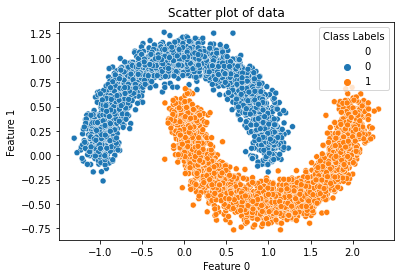

In [56]:
import seaborn as sns
ax = sns.scatterplot(data = dfx,x = 0,y =1 , hue =  dfy[0])
ax.set(xlabel = 'Feature 0', ylabel = 'Feature 1' ,title = 'Scatter plot of data')
ax.legend(title = 'Class Labels')
plt.show()

In [7]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix

In [8]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import GaussianNB

In [9]:
x_train,x_test,y_train,y_test = train_test_split(dfx.values,dfy.values,test_size = 0.2,random_state = 5)
x_train

array([[ 1.70058748, -0.048074  ],
       [ 0.17514851, -0.09510135],
       [ 0.89720271,  0.4388597 ],
       ...,
       [ 1.0513034 , -0.03997969],
       [ 2.08456019,  0.05894791],
       [ 0.25368387, -0.10397291]])

In [10]:
model = GaussianNB()
model.fit(x_train,y_train.ravel())

GaussianNB()

In [11]:
pred = model.predict(x_test)
# pred

In [12]:
accuracy_score(y_test,pred)

0.8811111111111111

In [13]:
confusion_matrix(y_test,pred)

array([[401,  54],
       [ 53, 392]], dtype=int64)

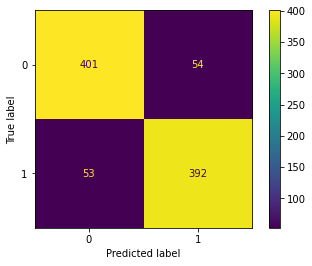

In [14]:
plot_confusion_matrix(model,x_test,y_test)

In [15]:
model.get_params

<bound method BaseEstimator.get_params of GaussianNB()>

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [27]:
logisticRegr = LogisticRegression(solver = 'liblinear')
logisticRegr.fit(x_train, y_train.ravel())
predictions = logisticRegr.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[398  57]
 [ 53 392]]


In [30]:
acc=metrics.accuracy_score(y_test, predictions)
acc

0.8777777777777778

In [36]:
logisticRegr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [37]:
import numpy as np

In [109]:
import warnings
warnings.filterwarnings('ignore')
modelLog = LogisticRegression()
log_parameters =  {'C' : np.logspace(-2,-1,30),'penalty' : ['l1', 'l2', 'elasticnet', 'none'],'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
clf = GridSearchCV(modelLog,log_parameters,cv = 10,verbose=0,n_jobs=11)#,scoring='f1_macro')
clf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=11,
             param_grid={'C': array([0.01      , 0.01082637, 0.01172102, 0.01268961, 0.01373824,
       0.01487352, 0.01610262, 0.01743329, 0.01887392, 0.0204336 ,
       0.02212216, 0.02395027, 0.02592944, 0.02807216, 0.03039195,
       0.03290345, 0.03562248, 0.0385662 , 0.04175319, 0.04520354,
       0.04893901, 0.05298317, 0.05736153, 0.06210169, 0.06723358,
       0.07278954, 0.07880463, 0.08531679, 0.09236709, 0.1       ]),
                         'l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [84]:
LogisticRegression()

LogisticRegression()

In [110]:
clf.best_params_

{'C': 0.08531678524172806,
 'l1_ratio': 0.0,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [111]:
clf.best_score_*100

88.41666666666667

In [112]:
accuracy_score(y_test,clf.predict(x_test))

0.88

In [ ]:
print(classification_report(y_test,pred))

In [76]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [116]:
from sklearn.neighbors import KNeighborsClassifier 

In [127]:
knn = KNeighborsClassifier()
params = {'n_neighbors' : np.arange(2,10,1),'metric':['cityblock','cosine','euclidean','haversine','l1','l2','manhattan','nan_euclidean'],'weights' : ['uniform', 'distance'],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}
clf = GridSearchCV(knn,params,cv = 10,n_jobs=8)
clf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=8,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['cityblock', 'cosine', 'euclidean',
                                    'haversine', 'l1', 'l2', 'manhattan',
                                    'nan_euclidean'],
                         'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']})

In [129]:
clf.best_params_

{'algorithm': 'auto',
 'metric': 'cityblock',
 'n_neighbors': 2,
 'weights': 'distance'}

In [130]:
clf.best_score_*100

100.0

In [131]:
accuracy_score(y_test,clf.predict(x_test))

0.9977777777777778

In [123]:
from sklearn.metrics.pairwise import distance_metrics
['cityblock','cosine','euclidean','haversine','l1','l2','manhattan','nan_euclidean]

In [2]:
'cityblock'     metrics.pairwise.manhattan_distances
'cosine'        metrics.pairwise.cosine_distances
'euclidean'     metrics.pairwise.euclidean_distances
'haversine'     metrics.pairwise.haversine_distances
'l1'            metrics.pairwise.manhattan_distances
'l2'            metrics.pairwise.euclidean_distances
'manhattan'     metrics.pairwise.manhattan_distances
'nan_euclidean'

SyntaxError: invalid syntax (Temp/ipykernel_24312/3359535922.py, line 1)

In [3]:
from sklearn.metrics import classification_report

In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       455
           1       0.88      0.88      0.88       445

    accuracy                           0.88       900
   macro avg       0.88      0.88      0.88       900
weighted avg       0.88      0.88      0.88       900



In [61]:
pd.read_csv('test_data_prediction.txt',header = None)

,0
0,1
1,1
2,0
3,0
4,0
...,...
495,1
496,1
497,0
498,0
